# INF0417 - Visão computacional
## Lab3 - Rastreamento visual

# 1. Introdução

Neste laboratório você implementará a versão original do famoso algoritmo para rastreamento de features de Lucas-Kanade, o **LK-tracker**. \
A menos que seja implementado com operações de baixo nível, o LK-tracker se torna computacionalmente restritivo se tentarmos rastrear cada píxel na imagem. \
Assim, nesta atividade vamos restringir a tarefa de rastreamento a somente uma única região por vez (centrada ao redor de um píxel). \
Isso significa que a escolha do píxel a ser rastreado deve ser feita *"sabiamente"*. \
Além disso, devido à sua estreita relação com o LK-tracker, também incorporaremos o **detector de Harris** (*aka.*, Harris-Stephens detector) para encontrar *"automaticamente"* features *"boas"* de serem rastreadas.

## 1.1 Preparação

Como preparação para este laboratório, você deverá ler este guia e completar as atividades marcadas com **estrela (*)**. \
Parte da preparação consiste em ler e entender o artigo simplificado do rastreador LK-tracker ["Derivation of the Lucas-Kanade Tracker"](./references/2007%20-%20LK-derivation.pdf) \[1\]. \
Vamos a utilizar a mesma notação do artigo ao fazer perguntas sobre uma expressão em específico ou uma variável, *e.g.*, $T$. \
Para completar os exercícios a tempo, é importante estar familiarizado com os diferentes passos envolvidos no algoritmo de rastreamento LK-tracker.

O laboratório será implementado em Python Notebook (não use Google colab!). \
Na sala de laboratório do INF, você pode executar o Python desde o prompt no shell do `Ubuntu App`. \
Use `python3 <meu_script>.py` para executar um script Python ou, preferencialmente, trabalhe com uma IDE como `vscode` ou `pycharm`. \
Se você utiliza múltiplos scripts (recomendado) poderá salvar e carregar dados utilizando o pacote `pickle` ou `np.save/load`. \
Para um trabalho mais interativo, você também pode usar `ipython3`, que permite auto-completar comandos com tabs e também conta com  destaque de sintaxe.

Adicionando `from INF0417_labs import lab3` nos seus scripts, você poderá usar o código de suporte para este laboratório. \
Este código inclui funções auxiliares, tais como `lab3.load_lab_image` e `lab3.get_cameraman`. \
Use `help(lab3)` para obter uma descrição deste pacote.

**Dica**: Bugs, em códigos científicos, são fáceis de introduzir, mas difíceis de achar. \
São práticas recomendadas:
- Ler a documentação das funções que você usa e;
- Escrever códigos de teste que verifique que elas se comportem conforme o esperado.

**Preste atenção** para não confundir as indexações $(x,y)$ e $(\text{linha}, \text{coluna})$, pois você provavelmente usará ambas neste laboratório. \
Em laboratórios futuros, usaremos a $nD$-indexação, com exponencialmente mais maneiras de cometer tais erros.

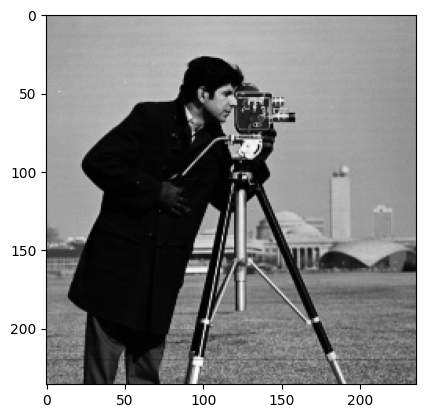

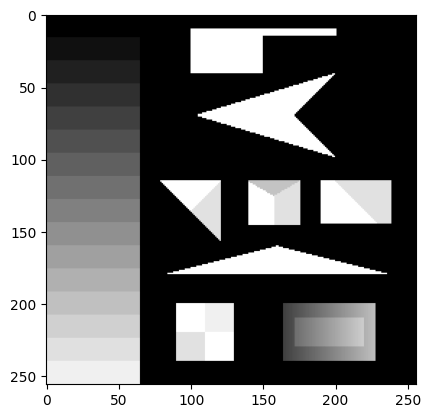

In [7]:
from INF0417_labs import lab3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Mapa de cores verde-preto-vermelho para os gradientes
gkr_col = np.zeros((255, 4))
gkr_col[:, 3] = 1
gkr_col[:127, 1] = np.linspace(1.0, 0.0, 127, False)
gkr_col[127:, 0] = np.linspace(0.0, 1.0, 128, True)
gkr_col = ListedColormap(gkr_col)

# cameraman
I, J, dTrue = lab3.get_cameraman()
plt.figure()
plt.imshow(I, cmap='gray')
plt.show()

# cornertest
img = lab3.load_lab_image('cornertest.png')
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

# 4. O detector de Harris (1.0p)

No exercício anterior, selecionamos *"manualmente"* a região a rastrear, embora seja mais conveniente detectar *"automaticamente"* as melhores features a rastrear. \
Devido à sua proximidade com o LK-tracker, vamos utilizar [o detector de Harris](./references/1988%20-%20Harris-Stephens-detector.pdf) para isso.
Revise a resposta para a pergunta de preparação anterior. \
Qual é a sua apreciação sobre o que são *"features boas"*? \
Um bom termômetro é perceber que boas features de se rastrear são basicamente as mesmas features que podemos detectar com o detector de Harris.

**\* Passo de preparação**: Escreva a expressão utilizada para calcular a *"resposta de Harris"*, *i.e.*, a imagem antes do *"2D non-max suppression"*.

In [1]:
# Escreva aqui sua resposta

Agora, você implementará uma função para estimar a resposta de Harris para cada píxel na imagem. \
Depois usaremos esta função para extrair uma feature "boa" para rastrear com o LK-tracker.

## 4.1 Tensor de orientação (4.0p)

Implemente uma função que retorne o *"tensor de orientação"* para todos os píxeis de uma imagem (*i.e.*, um campo tensorial). \
Uma função protótipo possível é:

`tensor_orientacao(img, grad_kernel_size, grad_sigma, kernel_size, sigma) -> T_campo`

**Dica**: Isso foi discutido na aula prática [`INF0417_python-tutorial.ipynb`](https://github.com/aldodiaz-UFG/INF0417/blob/main/lab01_tutorial-python/lab01_python-tutorial.ipynb).

In [2]:
# Escreva aqui sua resposta

def tensor_orientacao(img, grad_kernel_size, grad_sigma, window_size):
    T_campo = np.empty(img.shape + (2, 2))
    
    ... = gradiente_regularizado(..., ..., ..., ...)
    
    height, width = img.shape
    for x in range(width):
        for y in range(height):
            T_campo[..., ..., :, :] = estimar_T(..., ..., ..., ..., ...)
    
    return T_campo

## 4.2 Implementação do detector de Harris (4.0p)

Agora que você tem o tensor de orientação, deveria ser capaz de estimar a resposta de Harris para todos os píxeis. \
Implemente uma função que estime a resposta de Harris para todos os píxeis de uma imagem. \
Uma função protótipo possível é:

`harris(T_campo, kappa) -> H_field`

In [3]:
# Escreva aqui sua resposta

def harris(T_campo, kappa):
    H_campo = np.empty(T_campo.shape[0:2])
    
    T11 = ...
    T22 = ...
    T12 = ...
    
    # Reference: https://www.ipol.im/pub/art/2018/229/
    trT = ...
    detT = ...

    H_campo[:, :] = ...
        
    return H_campo

Teste esta função na imagem `cornertest.png`. \
Escolhendo um limiar para a resposta de Harris, você deveria ser capaz de detectar features boas de se rastrear.

**Pergunta**: Aumentando o limiar para a resposta de Harris, diferentes features podem ser obtidas. \
São estas as features esperadas?

In [4]:
I = lab3.load_lab_image('chessboard/img01.png')
# I = lab3.load_lab_image('cornertest.png')
print(I.shape)

fig, ax = plt.subplots()
plt.imshow(I, cmap='gray')
ax.axis('off')
plt.show()

NameError: name 'lab1' is not defined

In [ ]:
# Escreva aqui sua resposta

T_campo = tensor_orientacao(I, 13, 0.5, (13, 13))
H = harris(T_campo, kappa)

# Visualização
Mostre o resultado da resposta de Harris

In [ ]:
# Escreva aqui sua resposta

# Supressão de valores não-máximos (2.0p)
Coloque a seguinte operação numa função para permitir que o limiar de valores máximos da resposta de Harris seja um parâmetro controlável, assim como a quantidade de pontos a se rastrear

In [ ]:
# Non-max suppresion
mask = (H > H.max() * 0.3)
H_mask = H * mask
H_max = scipy.signal.order_filter(H_mask, np.ones((3, 3)), 9-1)
[row, col] = np.nonzero((H_mask == H_max) * mask)

mask = np.zeros(H.shape)
H_track = np.zeros(H.shape)
H_track[row, col] = H_max[row, col]
mask[100:-100, 100:-100] = 1
H_track = H_track * mask
[row, col] = np.unravel_index(np.argpartition(H_track, -5, None)[-5:], H_track.shape)
trackers = np.array(list(zip(col, row)))

print('Qtd. de pontos chave: %d' % len(trackers))
print('Pontos a rastrear   :\n', trackers)

In [ ]:
from matplotlib.patches import Circle

window_size = 30

_, ax = plt.subplots(1, num='J1')
ax.imshow(I, cmap='gray')

for tracker in trackers:
    ax.add_patch(Circle(tuple(tracker), window_size//2, edgecolor='red', linewidth=2, fill=False))

plt.axis('off')
plt.show()

# BONUS - Combinando o LK tracker com o detector de Harris (3.0p)

Agora que você garantiu que o LK-tracker e o detector de Harris estão funcionando, é tempo de combiná-los. \
Use o detector de Harris para encontrar as melhores $K$ features em `chessboard/img1.png` que deveriam ser rastreadas nos quadros seguintes `chessboard/img2.png`, `chessboard/img3.png`, $\dots$, `chesssboard/img10.png`. \
Evite rastrear features perto das bordas da imagem, pois isso pode causar problemas.

**Tarefa**: Verifique com o instrutor quando você tenha uma implementação funcional desta tarefa. \
Rastreie as melhores $K = 3$ features e certifique-se de que você está exibindo o resultado obtido em cada quadro.

In [ ]:
# Escreva aqui sua resposta
_, ax = plt.subplots(3, 3, num='J2-J10', figsize=(20, 20))
ax = ax.flatten()

for k in range(2, 11):
    J = lab3.load_lab_image('chessboard/img%02d.png' % k)
    ax[k-2].imshow(J, cmap='gray')
    
    for tracker in trackers:
        d = ...
        tracker[0] = ...
        tracker[1] = ...
        ax[k-2].add_patch(Circle(tuple(tracker), window_size/2, fill=False, edgecolor='red', linewidth=2))
    
    I = ...

plt.show()

# Referências

\[1\] Björn Johansson. Derivation of the Lucas-Kanade Tracker. 2007.